In [1]:
# Required imports
from __future__ import print_function
from __future__ import division
import pandas as pd  # For storing and manipulation of data files
import numpy as np  
from sklearn.ensemble import RandomForestClassifier # For finding the weights of features
import matplotlib.pyplot as plt  # For plotting figures
import seaborn as sns # To make figures more clear
from sklearn.feature_selection import SelectFromModel # For selecting the important features
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score # metric for model performance
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### DATA EXPLORATION AND PRE_PROCESSING

In [2]:
# Reading train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("Number of rows in the training set : {} and number of features : {}".format(train_data.shape[0],train_data.shape[1]))
print("Number of rows in the testing set  : {} and number of features : {}".format(test_data.shape[0],test_data.shape[1]))

Number of rows in the training set : 76020 and number of features : 371
Number of rows in the testing set  : 75818 and number of features : 370


Features and Target variable in the training set are seperated.ID is just the identifiaction number given to a customer,this variable is also extracted in both training and testing sets.

In [3]:
# Searching for Missing Data
print("Number of Missing values in Training set",train_data.isnull().sum().sum())
print("Number of Missing values in Testing set",test_data.isnull().sum().sum())

Number of Missing values in Training set 0
Number of Missing values in Testing set 0


In [4]:
# selecting the train labels
train_ID = train_data.ID

# Extrating ID and target from the train data and test data
train_data = train_data.drop(labels=["ID"],axis = 1).drop_duplicates()
print("After removing duplicates no of rows in the train data is :",train_data.shape[0])

# Maximum and minimum value in the train data
print("Maximun number in train data :",max(train_data.max()))
print("Minimum amount in train data :",min(train_data.min()))

# Removing these values as they are outliers
for feature in train_data.keys():
    train_data = train_data[train_data[feature] != -999999.00]
    train_data = train_data[train_data[feature] != 9999999999.0]

# Maximum and minimum value in the train data after noise removal
print("Maximun number in train data :",max(train_data.max()))
print("Minimum amount in train data :",min(train_data.min()))

After removing duplicates no of rows in the train data is : 71213
Maximun number in train data : 9999999999.0
Minimum amount in train data : -999999.0
Maximun number in train data : 22034738.76
Minimum amount in train data : -4942.26


In [5]:
train_labels = train_data.TARGET
train_features = train_data.drop(labels=["TARGET"],axis = 1)
test_ID = test_data.ID
test_features = test_data.drop("ID",axis = 1)

In [6]:
# Sample structure of the features
train_features.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,...,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,7.057100e+04
mean,2.759349,33.443582,78.620067,77.067194,127.607221,3.735173,6.847149,0.444831,0.611159,3.319763,...,0.151575,7.896149,1.470553,11.001077,8.025597,23.746897,1.490729,42.351595,28.143850,1.169753e+05
std,9.735876,13.025949,1195.799122,348.882494,563.329251,95.672929,158.821150,31.764236,37.896630,98.060591,...,30.366251,442.177056,118.276828,621.667522,438.724181,1979.705347,132.162255,3348.487651,2039.339273,1.882382e+05
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.574374e+04
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.983727e+04
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.227576e+05
max,238.000000,105.000000,135000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,7331.340000,50003.880000,20385.720000,63317.190000,42767.160000,438329.220000,24650.010000,681462.900000,374947.530000,2.203474e+07


All the features in the dataset are numerical features.So,there is no need for conversion of categorical data using one hot encoding.
But Number of features are too large for such a small dataset. Feature selection has to be performed to extract important features.

In [7]:
print("Data types and count of features : ",(np.unique(train_features.dtypes,return_counts=True)))

Data types and count of features :  (array([dtype('int64'), dtype('float64')], dtype=object), array([258, 111]))


Values for few columns like var38 is so high.There is a huge differences between 75th percentile and max values.
To avoid model giving high weitage to large values.we should normalize this data.

In [8]:
# Normalize each feature individually
normalized_train_data = pd.DataFrame(normalize(train_features,axis=0))
normalized_test_data = pd.DataFrame(normalize(test_features,axis = 0))

In [9]:
# Now the train data is more normalized.
normalized_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
count,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,...,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000,70571.000000
mean,0.001026,0.003508,0.000247,0.000812,0.000832,0.000147,0.000162,0.000053,0.000061,0.000127,...,0.000019,0.000067,0.000047,0.000067,0.000069,0.000045,0.000042,0.000048,0.000052,0.001987
std,0.003622,0.001366,0.003756,0.003676,0.003671,0.003761,0.003761,0.003764,0.003764,0.003762,...,0.003764,0.003764,0.003764,0.003764,0.003764,0.003764,0.003764,0.003764,0.003764,0.003197
min,0.000000,0.000524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000088
25%,0.000744,0.002412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001117
50%,0.000744,0.002937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001696
75%,0.000744,0.004195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002085
max,0.088535,0.011013,0.424061,0.135785,0.137023,0.323879,0.262220,0.782083,0.655506,0.316052,...,0.908818,0.425626,0.648758,0.383341,0.366890,0.833410,0.702056,0.766035,0.692037,0.374267


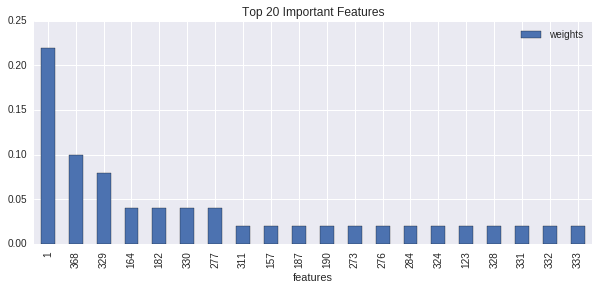

In [10]:
# Using adaboost method for exporting important features
adc = AdaBoostClassifier(n_estimators=50,random_state=50)
adc.fit(normalized_train_data,train_labels)

# Extracting features and corresponding weights
features = normalized_train_data.columns.values
weight_values = adc.feature_importances_

# Forming a data fram with features and corresponsding weights.Add sorting them based on weights
feature_weights = pd.DataFrame({'features':features,'weights':weight_values})
feature_weights.sort_values(['weights'],ascending=False,inplace=True)

# Plotting 20 important features with corresponding weights
top_20_features = feature_weights.head(20)
plt.figure()
top_20_features.plot(x =top_20_features.features,y =1, kind='bar',figsize=(10,4),title='Top 20 Important Features');
plt.savefig("Hello.png")

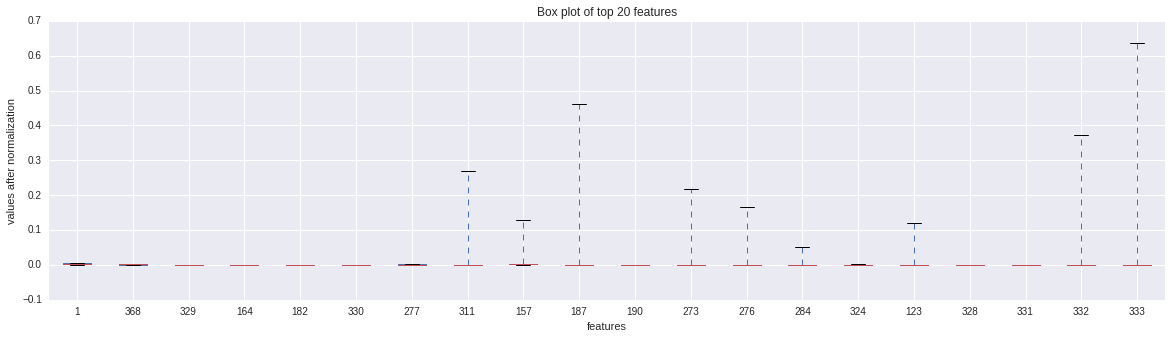

In [11]:
# Box plot of top 20 features 
plt.figure();
ax = normalized_train_data[top_20_features.features].plot(kind = 'box',title = "Box plot of top 20 features",figsize =(20,5));
ax.set_xlabel("features")
ax.set_ylabel("values after normalization")
plt.savefig("Boxplot of 20 features")

In [12]:
print("Data types and count of features : ",(np.unique(normalized_train_data[top_20_features.features].dtypes,return_counts=True)))

Data types and count of features :  (array([dtype('float64')], dtype=object), array([20]))


In [13]:
# Extracting features with overall cumulative weight of 95 percent
weights_cumsum = feature_weights.cumsum()
index_values = weights_cumsum[weights_cumsum.weights <= 0.95].index.tolist()
print("Number of features with 95% cumulative weight :",len(index_values))
top_95_percent_train_features = normalized_train_data[normalized_train_data.columns[index_values]]
top_95_percent_test_features  = normalized_test_data[normalized_test_data.columns[index_values]]

print("Shape of train features after future selection :",top_95_percent_train_features.shape)
print("Shape of test features after future selection: ",top_95_percent_test_features.shape)

Number of features with 95% cumulative weight : 26
Shape of train features after future selection : (70571, 26)
Shape of test features after future selection:  (75818, 26)


In [14]:
# Default Random Forest Model

defaultRF = RandomForestClassifier(random_state=50)
defaultRF.fit(normalized_train_data,train_labels)
DRF_predictions = defaultRF.predict_proba(normalized_test_data)
pd.DataFrame({"ID":test_ID.values,"TARGET":DRF_predictions[:,1]}).to_csv('submissionDFRandom.csv',index = False)

In [15]:
# Train and Model validation
# Few parameter values are removed as it would take time to run all the parameters.These parameter values are selected 
# After long train and errors.
rf = RandomForestClassifier(random_state=50)
parameters = [{'n_estimators':[1000,1200],'max_depth':[13,20]}]
clf = GridSearchCV(rf,cv=10,param_grid=parameters,scoring='roc_auc',verbose=3,n_jobs=4)
clf.fit(top_95_percent_train_features,train_labels.values)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_estimators=1000, max_depth=13 .................................
[CV] n_estimators=1000, max_depth=13 .................................
[CV] n_estimators=1000, max_depth=13 .................................
[CV] n_estimators=1000, max_depth=13 .................................
[CV] .. n_estimators=1000, max_depth=13, score=0.812484, total= 2.6min
[CV] n_estimators=1000, max_depth=13 .................................
[CV] .. n_estimators=1000, max_depth=13, score=0.831738, total= 2.6min
[CV] n_estimators=1000, max_depth=13 .................................
[CV] .. n_estimators=1000, max_depth=13, score=0.836059, total= 2.7min
[CV] n_estimators=1000, max_depth=13 .................................
[CV] .. n_estimators=1000, max_depth=13, score=0.828894, total= 2.8min
[CV] n_estimators=1000, max_depth=13 .................................
[CV] .. n_estimators=1000, max_depth=13, score=0.834319, total= 2.7min
[CV] n_estimator

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 19.8min


[CV] .. n_estimators=1000, max_depth=20, score=0.822654, total= 3.1min
[CV] n_estimators=1000, max_depth=20 .................................
[CV] .. n_estimators=1000, max_depth=20, score=0.840113, total= 3.1min
[CV] n_estimators=1000, max_depth=20 .................................
[CV] .. n_estimators=1000, max_depth=20, score=0.832281, total= 3.1min
[CV] n_estimators=1200, max_depth=20 .................................
[CV] .. n_estimators=1000, max_depth=20, score=0.855657, total= 3.2min
[CV] n_estimators=1200, max_depth=20 .................................
[CV] .. n_estimators=1000, max_depth=20, score=0.844922, total= 3.2min
[CV] n_estimators=1200, max_depth=20 .................................
[CV] .. n_estimators=1000, max_depth=20, score=0.818095, total= 3.2min
[CV] n_estimators=1200, max_depth=20 .................................
[CV] .. n_estimators=1200, max_depth=20, score=0.824951, total= 3.7min
[CV] n_estimators=1200, max_depth=20 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 35.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [1000, 1200], 'max_depth': [13, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=3)

In [16]:
# Getting parameters of the best estimator
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [17]:
# predictions of the best model
predictions = clf.predict_proba(top_95_percent_test_features)

In [18]:
# Saving predictions of best model
pd.DataFrame({"ID":test_ID.values,"TARGET":predictions[:,1]}).to_csv('BestRandomForestModel.csv',index = False)

In [19]:
# Initializing best model for sensitivity analysis 
best_rf = RandomForestClassifier(random_state=50 , max_depth=13,n_estimators=1200)

In [20]:
# Adding noise to training data
# No of rows in train data
no_of_rows = top_95_percent_train_features.shape[0]
for feature in top_95_percent_train_features.keys():
    std = top_95_percent_train_features[feature].std()
    # Adding random number in range of - STD  to STD to 5 different groups of each size 2% for every feature
    top_95_percent_train_features[feature][np.random.randint(0,no_of_rows,int(no_of_rows/50))].add(np.random.random_sample()/std)
    top_95_percent_train_features[feature][np.random.randint(0,no_of_rows,int(no_of_rows/50))].add(np.random.random_sample()/std)
    top_95_percent_train_features[feature][np.random.randint(0,no_of_rows,int(no_of_rows/50))].add(np.random.random_sample()/std)
    top_95_percent_train_features[feature][np.random.randint(0,no_of_rows,int(no_of_rows/50))].add(np.random.random_sample()/std)
    top_95_percent_train_features[feature][np.random.randint(0,no_of_rows,int(no_of_rows/50))].add(np.random.random_sample()/std)

In [21]:
best_rf.fit(top_95_percent_train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1200, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [22]:
# Getting predictions of the best model
predictions_sensivity = best_rf.predict_proba(top_95_percent_test_features)

In [23]:
# Saving predictions of best model after sensitivity test
pd.DataFrame({"ID":test_ID.values,"TARGET":predictions[:,1]}).to_csv('BestRandomForestSensivityModel.csv',index = False)